In [2]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('traffic_data.csv')
df.head()

C:\Users\MADHU SIDDHARTH S\AppData\Local\Temp\ipykernel_3428\1854309719.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('traffic_data.csv')


,Unnamed: 0,Sample Time,total
0,0,2021-01-01 00:00:00,10.0
1,1,2021-01-01 00:05:00,8.0
2,2,2021-01-01 00:10:00,4.0
3,3,2021-01-01 00:15:00,6.0
4,4,2021-01-01 00:20:00,12.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315528 entries, 0 to 315527
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   315528 non-null  int64 
 1   Sample Time  315528 non-null  object
 2   total        315528 non-null  object
dtypes: int64(1), object(2)
memory usage: 7.2+ MB


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
index_to_drop = df.total[df.total == '[nan]'].index.tolist()
df.drop(index_to_drop, axis=0, inplace = True)
df['Sample Time'] = pd.to_datetime(df['Sample Time'])
df['day_of_week'] = df['Sample Time'].apply(lambda x:x.weekday()+1)
df.head()

,Sample Time,total,day_of_week
0,2021-01-01 00:00:00,10.0,5
1,2021-01-01 00:05:00,8.0,5
2,2021-01-01 00:10:00,4.0,5
3,2021-01-01 00:15:00,6.0,5
4,2021-01-01 00:20:00,12.0,5


In [5]:
dummies = pd.get_dummies(df['day_of_week'])
dummies = dummies.astype(int)
dummies

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
315523,0,0,0,0,0,0,1
315524,0,0,0,0,0,0,1
315525,0,0,0,0,0,0,1
315526,0,0,0,0,0,0,1


In [6]:
df = pd.concat([df,dummies], axis = 1)
df.head()

,Sample Time,total,day_of_week,1,2,3,4,5,6,7
0,2021-01-01 00:00:00,10.0,5,0,0,0,0,1,0,0
1,2021-01-01 00:05:00,8.0,5,0,0,0,0,1,0,0
2,2021-01-01 00:10:00,4.0,5,0,0,0,0,1,0,0
3,2021-01-01 00:15:00,6.0,5,0,0,0,0,1,0,0
4,2021-01-01 00:20:00,12.0,5,0,0,0,0,1,0,0


In [7]:
df.columns = ['Sample Time', 'total','day_of_week','monday','tuesday','wednesday','thursday','friday','saturday','sunday']
df.head()

,Sample Time,total,day_of_week,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2021-01-01 00:00:00,10.0,5,0,0,0,0,1,0,0
1,2021-01-01 00:05:00,8.0,5,0,0,0,0,1,0,0
2,2021-01-01 00:10:00,4.0,5,0,0,0,0,1,0,0
3,2021-01-01 00:15:00,6.0,5,0,0,0,0,1,0,0
4,2021-01-01 00:20:00,12.0,5,0,0,0,0,1,0,0


In [8]:
hour = np.hstack([df['Sample Time'].dt.hour.values.reshape(-1,1),
                  df['Sample Time'].dt.minute.values.reshape(-1,1)])
hour

array([[ 0,  0],
       [ 0,  5],
       [ 0, 10],
       ...,
       [23, 45],
       [23, 50],
       [23, 55]])

In [9]:
df = pd.concat([df, pd.DataFrame(hour, columns=['hour','minutes'])], axis = 1)
df.dropna(inplace = True)
df.head()

,Sample Time,total,day_of_week,monday,tuesday,wednesday,thursday,friday,saturday,sunday,hour,minutes
0,2021-01-01 00:00:00,10.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2021-01-01 00:05:00,8.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
2,2021-01-01 00:10:00,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0
3,2021-01-01 00:15:00,6.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0
4,2021-01-01 00:20:00,12.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0


In [10]:
dummy_hour = pd.get_dummies(df['hour'])
dummy_hour = dummy_hour.astype(int)
dummy_minutes = pd.get_dummies(df['minutes'])
dummy_minutes = dummy_minutes.astype(int)
df = pd.concat([df,dummy_hour, dummy_minutes], axis = 1)
df.head()

,Sample Time,total,day_of_week,monday,tuesday,wednesday,thursday,friday,saturday,sunday,...,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0
0,2021-01-01 00:00:00,10.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01 00:05:00,8.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01 00:10:00,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,2021-01-01 00:15:00,6.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,2021-01-01 00:20:00,12.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
columns = df.columns[:12].tolist() + ['hour' + str(x) for x in range(24)] + ['minute' + str(i) for i in range(0,60,5)]
df.columns = columns

In [17]:
df.to_csv('station_data.csv')

In [3]:
df = pd.read_csv('data.csv')
df.sort_values(['Sample Time'], inplace=True, ascending=True)
df.head()

,Sample Time,1212480 Lane 1 Flow,1212480 Lane 2 Flow,1212480 Lane 3 Flow,day_of_week,day1,day2,day3,day4,day5,...,minute15,minute20,minute25,minute30,minute35,minute40,minute45,minute50,minute55,total
101348,01-01-2021 00:00,1,6,3,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
101349,01-01-2021 00:05,0,3,5,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8
101350,01-01-2021 00:10,0,2,2,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
101351,01-01-2021 00:15,1,5,0,5,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,6
101352,01-01-2021 00:20,1,9,2,5,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,12


In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
train_features = df.drop(['Sample Time','total', '1212480 Lane 1 Flow','1212480 Lane 2 Flow','1212480 Lane 3 Flow','day_of_week','hour','minute'], axis = 1)
poly = PolynomialFeatures(2)
train_label = df['total']
x_train, x_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.1, random_state=1, shuffle=True)
poly.fit(x_train)
poly_x_train = poly.transform(x_train)
poly_x_test = poly.transform(x_test)

In [10]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(poly_x_train, y_train)
pred = lasso.predict(poly_x_test)
print('r2 : {0}, mae : {1}, mse : {2}'.format(r2_score(y_test, pred), mean_absolute_error(y_test, pred), mean_squared_error(y_test,pred)))

r2 : 0.7190994943988663, mae : 38.45568893776878, mse : 2436.254036599393


In [5]:
lr = LinearRegression()
lr.fit(poly_x_train, y_train)
pred = lr.predict(poly_x_test)
print('r2 : {0}, mae : {1}, mse : {2}'.format(r2_score(y_test, pred), mean_absolute_error(y_test, pred), mean_squared_error(y_test,pred)))

r2 : 0.8752701917050676, mae : 21.4052411306821, mse : 1081.783381957612


In [8]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(poly_x_train, y_train)
pred = rr.predict(poly_x_test)
print('r2 : {0}, mae : {1}, mse : {2}'.format(r2_score(y_test, pred), mean_absolute_error(y_test, pred), mean_squared_error(y_test,pred)))

r2 : 0.8752589203386744, mae : 21.38455844105111, mse : 1081.8811386768984


In [41]:
from sklearn.linear_model import PoissonRegressor
pr = PoissonRegressor(alpha=10)
pr.fit(x_train, y_train)
pred = pr.predict(x_test)
print('r2 : {0}, mae : {1}, mse : {2}'.format(r2_score(y_test, pred), mean_absolute_error(y_test, pred), mean_squared_error(y_test,pred)))

r2 : 0.4433378534427165, mae : 59.07352259157373, mse : 4827.9386278427255


In [42]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=100, random_state=1)
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
print('r2 : {0}, mae : {1}, mse : {2}'.format(r2_score(y_test, pred), mean_absolute_error(y_test, pred), mean_squared_error(y_test,pred)))

r2 : 0.8743929731727813, mae : 21.453151874085954, mse : 1089.391510628256


In [12]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(poly_x_train, y_train)
pred = rf.predict(poly_x_test)
print('r2 : {0}, mae : {1}, mse : {2}'.format(r2_score(y_test, pred), mean_absolute_error(y_test, pred), mean_squared_error(y_test,pred)))

r2 : 0.877303058153554, mae : 20.942926909669122, mse : 1064.1523026528812


In [13]:
import joblib
joblib.dump(rf, 'poly_rf.pkl')

['poly_rf.pkl']

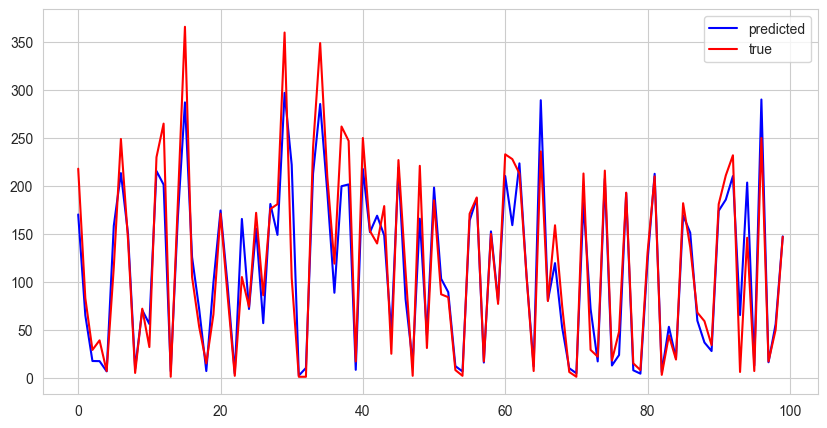

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(np.arange(100),pred[:100],label='predicted',color='blue')
plt.plot(np.arange(100),y_test[:100], label = 'true',color='red')
plt.legend()

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD

<Axes: xlabel='total', ylabel='Count'>

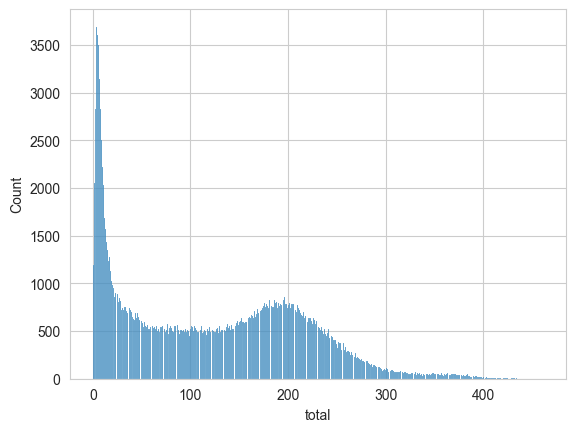

In [44]:
import seaborn as sns
sns.histplot(data=df, x='total', bins=500)

In [13]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (x_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(x_train,
                  y_train,
                  batch_size = 50,
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12


C:\Users\MADHU SIDDHARTH S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3608/3608 ━━━━━━━━━━━━━━━━━━━━ 179s 48ms/step - accuracy: 0.0101 - loss: 9868.9785
Epoch 2/12
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 171s 47ms/step - accuracy: 0.0102 - loss: 8635.8633
Epoch 3/12
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 163s 45ms/step - accuracy: 0.0103 - loss: 8616.4238
Epoch 4/12
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 165s 46ms/step - accuracy: 0.0101 - loss: 8635.5557
Epoch 5/12
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 163s 45ms/step - accuracy: 0.0102 - loss: 8647.6514
Epoch 6/12
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 165s 46ms/step - accuracy: 0.0101 - loss: 8666.6211
Epoch 7/12
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 161s 45ms/step - accuracy: 0.0100 - loss: 8596.5342
Epoch 8/12
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 162s 45ms/step - accuracy: 0.0103 - loss: 8595.2236
Epoch 9/12
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 161s 45ms/step - accuracy: 0.0098 - loss: 8631.9043
Epoch 10/12
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 160s 44ms/step - accuracy: 0.0099 - loss: 8618.5811
Epoch 11/12
3608/3608 ━━━━━━━━━━━━━━━━━━━━ 160s 44ms/step - accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 43, 50)            │     10,400 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)                │     20,200 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 25)                │      1,275 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 1)                 │         26 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [14]:
pred = regressorLSTM.predict(x_test)
print('r2 : {0}, mae : {1}, mse : {2}'.format(r2_score(y_test, pred), mean_absolute_error(y_test, pred), mean_squared_error(y_test,pred)))

627/627 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
r2 : -2.377498048655724e-06, mae : 81.2311433299407, mse : 8673.03468740634


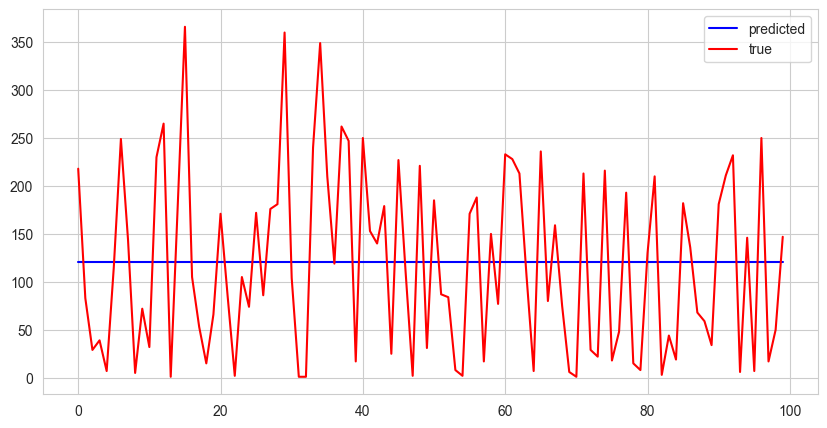

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(np.arange(100),pred[:100],label='predicted',color='blue')
plt.plot(np.arange(100),y_test[:100], label = 'true',color='red')
plt.legend()

In [13]:
def plot_predictions(y_test, pred):
    fig, ax = plt.subplots(figsize = (15,5))
    plt.plot(np.arange(len(y_test)), y_test, label='actual_traffic', color = 'green', linewidth = 0.8)
    plt.plot(np.arange(len(pred)), pred, label='predicted_value',color='blue',linewidth = 0.8)
    xticks = df.iloc[y_test.index]['Sample Time']
    plt.xticks(np.arange(len(y_test)), list(xticks), rotation = 90, ha='left')
    plt.xlabel('date_time')
    plt.ylabel('count')
    plt.title('predicted vs actual traffic')
    plt.legend()
    plt.show()

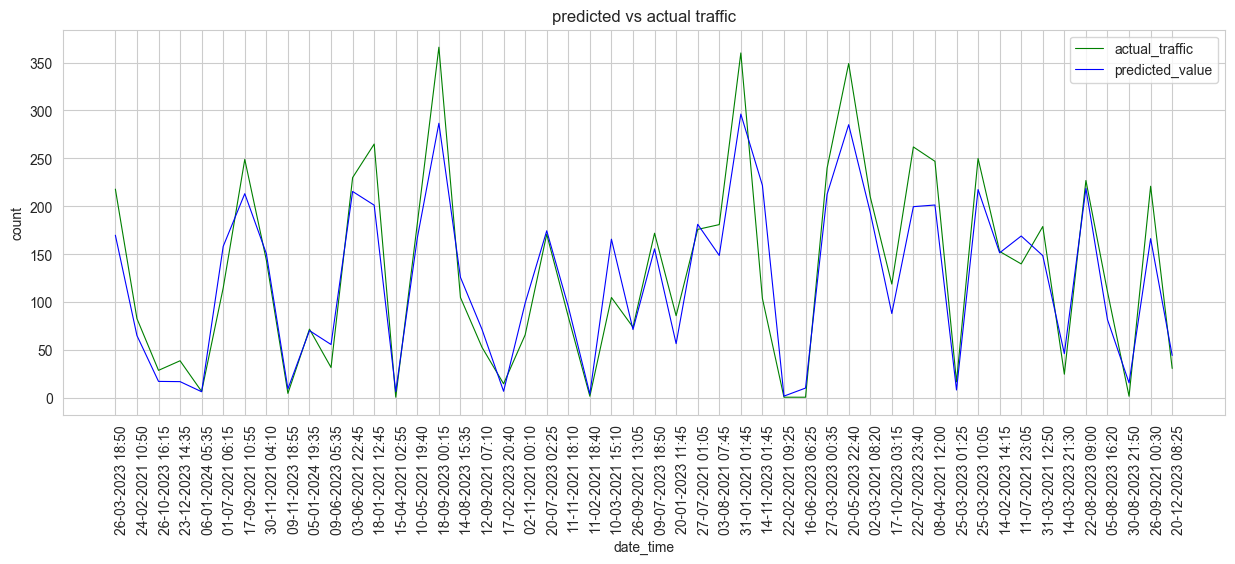

In [39]:
plot_predictions(y_test[:50], pred[:50])

In [7]:
# method 2
import math
data = df['total']
training_data_len = math.ceil(len(data)*0.9)
train_data = np.array(data.iloc[:training_data_len]).reshape(-1,1)
test_data = np.array(data.iloc[training_data_len:]).reshape(-1,1)
print(train_data.shape, test_data.shape)

(180368, 1) (20040, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
scaled_train = scale.fit_transform(train_data)
scaled_test = scale.fit_transform(test_data)

In [8]:
x_train = []
y_train = []
for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i])
    y_train.append(train_data[i])

array([[10],
       [ 8],
       [ 4],
       [ 6],
       [12],
       [11],
       [15],
       [15],
       [14],
       [11],
       [11],
       [15],
       [15],
       [15],
       [ 7],
       [17],
       [14],
       [10],
       [12],
       [12],
       [11],
       [ 9],
       [11],
       [ 7],
       [10],
       [ 8],
       [ 8],
       [ 5],
       [ 8],
       [13],
       [ 9],
       [ 5],
       [ 7],
       [ 4],
       [ 3],
       [ 6],
       [ 7],
       [ 3],
       [ 4],
       [ 3],
       [ 5],
       [ 6],
       [ 3],
       [ 2],
       [ 7],
       [ 7],
       [ 4],
       [ 5],
       [ 3],
       [ 7]], dtype=int64)

In [9]:
y_train[:10]

[array([3], dtype=int64),
 array([10], dtype=int64),
 array([6], dtype=int64),
 array([2], dtype=int64),
 array([4], dtype=int64),
 array([11], dtype=int64),
 array([9], dtype=int64),
 array([11], dtype=int64),
 array([15], dtype=int64),
 array([8], dtype=int64)]

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(180318, 50, 1)

In [11]:
y_train.shape

(180318, 1)

In [12]:
x_test = []
y_test = []
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i])
    y_test.append(test_data[i])
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape, y_test.shape)

(19990, 50, 1) (19990, 1)


In [16]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
                        activation = "relu",
                        return_sequences = True,
                        input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
                        activation = "relu",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50,
                        activation = "relu",
                        return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6,
                                  momentum=0.9,
                                  nesterov=True),
                  loss = "mean_squared_error")

# fitting the model
regressor.fit(x_train, y_train, epochs = 10, batch_size = 20)
regressor.summary()

C:\Users\MADHU SIDDHARTH S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\MADHU SIDDHARTH S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 554s 60ms/step - loss: nan
Epoch 2/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 495s 55ms/step - loss: nan
Epoch 3/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 483s 53ms/step - loss: nan
Epoch 4/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 434s 48ms/step - loss: nan
Epoch 5/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 433s 48ms/step - loss: nan
Epoch 6/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 518s 57ms/step - loss: nan
Epoch 7/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 431s 48ms/step - loss: nan
Epoch 8/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 428s 48ms/step - loss: nan
Epoch 9/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 456s 51ms/step - loss: nan
Epoch 10/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 454s 50ms/step - loss: nan


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 50, 50)            │      2,600 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50, 50)            │      5,050 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 50, 50)            │      5,050 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 50)                │      5,050 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pred = regressor.predict(x_test)
print('r2 : {0}, mae : {1}, mse : {2}'.format(r2_score(y_test, pred), mean_absolute_error(y_test, pred), mean_squared_error(y_test,pred)))
# plot_predictions(y_test[100:150], pred[100:150])

In [30]:
np.squeeze(x_test, axis = -1).shape

(19990, 50)

In [38]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape = (x_train.shape[1],1)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(x_train,
                  y_train,
                  batch_size = 20,
                  epochs = 10)
regressorLSTM.summary()

C:\Users\MADHU SIDDHARTH S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 448s 49ms/step - accuracy: 0.0107 - loss: 1959.0068
Epoch 2/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 513s 57ms/step - accuracy: 0.0106 - loss: 402.6689
Epoch 3/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 549s 61ms/step - accuracy: 0.0105 - loss: 392.5721
Epoch 4/10
9016/9016 ━━━━━━━━━━━━━━━━━━━━ 556s 62ms/step - accuracy: 0.0106 - loss: 386.8112
Epoch 5/10
 949/9016 ━━━━━━━━━━━━━━━━━━━━ 8:56 66ms/step - accuracy: 0.0099 - loss: 371.6411

KeyboardInterrupt: 

In [ ]:
pred = regressorLSTM.predict(x_test)
print('r2 : {0}, mae : {1}, mse : {2}'.format(r2_score(y_test, pred), mean_absolute_error(y_test, pred), mean_squared_error(y_test,pred)))